In [2]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


#Data Augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

2024-01-09 21:53:16.290273: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
df_train = pd.read_csv('digitclassification.csv')
df_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df_train.shape

(42000, 785)

In [5]:
X = df_train.drop(['label'], axis=1)
y = df_train['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y, train_size=0.8)
X_train.shape, X_test.shape

((33600, 784), (8400, 784))

In [6]:
data_gen = ImageDataGenerator(
    rotation_range=20,  # degrees
    width_shift_range=0.2,  # fraction of total width
    height_shift_range=0.2,  # fraction of total height
    shear_range=0.2,  # shear intensity (shear angle in counter-clockwise direction)
    zoom_range=0.2,  # zoom range
    horizontal_flip=True,  # enable horizontal flip
    fill_mode='nearest'  # strategy used for filling in newly created pixels
)

In [7]:
# Reshape the data to (num_samples, 28, 28, 1)
X_train_reshaped = X_train.values.reshape(-1, 28, 28, 1)
X_test_reshaped = X_test.values.reshape(-1, 28, 28, 1)

# Assuming X_train is your input features and y_train are the labels
train_generator = data_gen.flow(X_train_reshaped, y_train)

In [8]:
model = keras.Sequential([
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

early_stopping = keras.callbacks.EarlyStopping(
    patience=5,
    min_delta=0.001,
    restore_best_weights=True,
)

# Now use the reshaped data for training and validation
history = model.fit(
    train_generator,
    validation_data=(X_test_reshaped, y_test),
    batch_size=32,
    epochs=10,
    callbacks=[early_stopping],
)

Epoch 1/10
1050/1050 [==============================] - 31s 28ms/step - loss: 1.1558 - accuracy: 0.6207 - val_loss: 0.3570 - val_accuracy: 0.8619
Epoch 2/10
1050/1050 [==============================] - 32s 30ms/step - loss: 0.5095 - accuracy: 0.8336 - val_loss: 0.2081 - val_accuracy: 0.9375
Epoch 3/10
1050/1050 [==============================] - 35s 34ms/step - loss: 0.3810 - accuracy: 0.8806 - val_loss: 0.2196 - val_accuracy: 0.9308
Epoch 4/10
1050/1050 [==============================] - 30s 28ms/step - loss: 0.3272 - accuracy: 0.8974 - val_loss: 0.1336 - val_accuracy: 0.9593
Epoch 5/10
1050/1050 [==============================] - 30s 29ms/step - loss: 0.2885 - accuracy: 0.9101 - val_loss: 0.1295 - val_accuracy: 0.9624
Epoch 6/10
1050/1050 [==============================] - 31s 30ms/step - loss: 0.2712 - accuracy: 0.9157 - val_loss: 0.1362 - val_accuracy: 0.9593
Epoch 7/10
1050/1050 [==============================] - 30s 29ms/step - loss: 0.2590 - accuracy: 0.9219 - val_loss: 0.1402 -

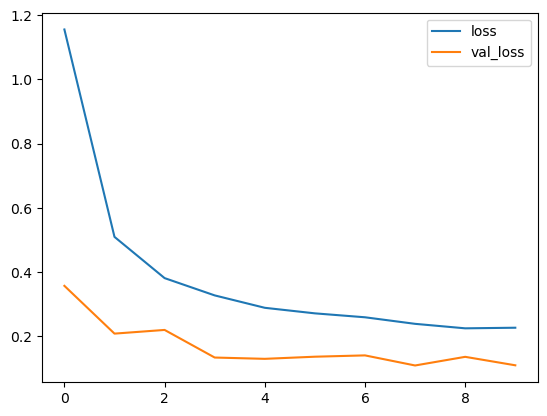

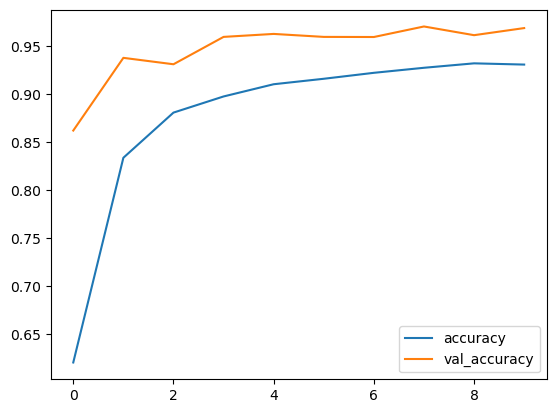

In [9]:
history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['accuracy', 'val_accuracy']].plot();

In [10]:
history_frame['val_loss'].min()

0.10881921648979187

In [ ]:
# df_test = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')
# df_test.head()
# df_test_reshaped = df_test.values.reshape(-1, 28, 28, 1)
# y_predict_prob = model.predict(df_test_reshaped)
# y_predict = [i.argmax() for i in y_predict_prob]
# df_submission = pd.read_csv('/kaggle/input/digit-recognizer/sample_submission.csv')
# df_submission.head()
# df_submission['Label'] = y_predict
# df_submission.head()
# df_submission.to_csv('sample_submission_1.csv', index=False)